**Conjoint Analysis**
----------------------

**An outline of the Conjoint Analysis performed:**

The following Conjoint Analysis is aimed at the launch of a new product- `The Brilliant Gems Chocolate Bar` in the `Cadbury` brand in India. This initiative includes the rich, chocolatey taste of Gems pellets in a radiant, colourful chocolate bar. 
The analysis also aims at analyzing and improving the existing chocolate bars sold by Cadbury in India.

The preferences of various people on the following attributes of the Cadbury brand has been collected:
1. Chocolate Name (Name):  Diary Milk, 5 Star, Fuse, Perk, Bournville/ Temptations, Gems
2. Size of chocolate (Size): Small, Medium, Large
3. Inner wrapping (Wrapping) - Gold Foil, Silver foil, no foil wrapping

The `importance of each of the attributes has been derived and market share of each of the attribute-combinations has been obtained in the analysis`.
Let's dive right into the analysis!

## Libraries Import

In [702]:
from pyDOE2 import fracfact, fullfact
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Fractional Factorial Analysis

In [705]:
a = ['Diary Milk', '5 Star', 'Fuse', 'Perk', 'Brilliant Gems Bar', 'Bournville/ Temptations']
b = ['Small', 'Medium', 'Large']
c = ['Gold foil', 'Silver foil', 'no foil wrapper']

In [707]:
ff=fullfact([6, 3, 3])
ff2 = pd.DataFrame(ff)
ff2.head()

,0,1,2
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,2.0,0.0,0.0
3,3.0,0.0,0.0
4,4.0,0.0,0.0


In [709]:
for i,j in zip(range(3), [a,b,c]):
    for k in range(6*3*3):
        ff2.iloc[k,i] = j[int(ff[k, i])]

C:\Users\Vani\AppData\Local\Temp\ipykernel_10156\3615425742.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Diary Milk' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ff2.iloc[k,i] = j[int(ff[k, i])]
C:\Users\Vani\AppData\Local\Temp\ipykernel_10156\3615425742.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ff2.iloc[k,i] = j[int(ff[k, i])]
C:\Users\Vani\AppData\Local\Temp\ipykernel_10156\3615425742.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Gold foil' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ff2.iloc[k,i] = j[int(ff[k, i])]


In [711]:
ff2.head()

,0,1,2
0,Diary Milk,Small,Gold foil
1,5 Star,Small,Gold foil
2,Fuse,Small,Gold foil
3,Perk,Small,Gold foil
4,Brilliant Gems Bar,Small,Gold foil


In [713]:
import pyDOE2

levels = [6, 3, 3]  # Three factors with 2, 3 or 4 levels respectively.
reduction = 5      # Reduce the number of experiment to approximately a third.

frf = pyDOE2.gsd(levels, reduction)
frf2 = pd.DataFrame(frf)

frf.shape

(12, 3)

In [715]:
for i,j in zip(range(3), [a,b,c]):
    for k in range(12):
        #print(k, i, j, j[int(frf[k,i])])
        frf2.iloc[k,i] = j[int(frf[k, i])]

C:\Users\Vani\AppData\Local\Temp\ipykernel_10156\2486371625.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Diary Milk' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  frf2.iloc[k,i] = j[int(frf[k, i])]
C:\Users\Vani\AppData\Local\Temp\ipykernel_10156\2486371625.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Small' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  frf2.iloc[k,i] = j[int(frf[k, i])]
C:\Users\Vani\AppData\Local\Temp\ipykernel_10156\2486371625.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Gold foil' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  frf2.iloc[k,i] = j[int(frf[k, i])]


In [717]:
frf2

,0,1,2
0,Diary Milk,Small,Gold foil
1,Bournville/ Temptations,Small,Gold foil
2,Diary Milk,Medium,Silver foil
3,Bournville/ Temptations,Medium,Silver foil
4,Diary Milk,Large,no foil wrapper
5,Bournville/ Temptations,Large,no foil wrapper
6,5 Star,Small,Silver foil
7,5 Star,Medium,no foil wrapper
8,Fuse,Small,no foil wrapper
9,Perk,Large,Gold foil


#### 12 attribute-combinations are fractional factorial analysis:

In [720]:
frf2.columns = ['Name', 'Size', 'Wrapping']
frf2

,Name,Size,Wrapping
0,Diary Milk,Small,Gold foil
1,Bournville/ Temptations,Small,Gold foil
2,Diary Milk,Medium,Silver foil
3,Bournville/ Temptations,Medium,Silver foil
4,Diary Milk,Large,no foil wrapper
5,Bournville/ Temptations,Large,no foil wrapper
6,5 Star,Small,Silver foil
7,5 Star,Medium,no foil wrapper
8,Fuse,Small,no foil wrapper
9,Perk,Large,Gold foil


## Survey Report Analysis

Now let's import the file of responses and analyse the data from it.

In [724]:
df = pd.read_excel('Cadbury Chocolate Bars - Preference Picks.xlsx')
df.tail()

,Timestamp,Diary Milk - Small - Gold foil,Bournville/ Temptations - Small - Gold foil,Diary Milk - Medium - Silver foil,Bournville/ Temptations - Medium - Silver foil,Diary Milk - Large - no foil wrapping,Bournville/ Temptations - Large - no foil wrapping,5 Star - Small - Silver foil,5 Star - Medium - no foil wrapping,Fuse - Small - no foil wrapping,Perk - Large - Gold foil,Brilliant Gems- Medium - Gold foil,Brilliant Gems - Large - Silver foil,Email Address
30,2024-11-06 23:00:39.753,5,5,5,5.0,5,5,5,5,5,5,5.0,5,shruti.sharada.s_ds24fall@praxistech.school
31,2024-11-06 23:02:02.065,2,3,3,2.0,3,1,5,3,4,3,5.0,5,sssharada99@gmail.com
32,2024-11-07 02:15:59.537,3,5,5,3.0,3,3,3,4,3,4,NaN,4,rakesh98.svce@gmail.com
33,2024-11-07 09:41:41.491,4,3,4,4.0,5,4,3,3,2,3,2.0,3,koushiklivi@gmail.com
34,2024-11-09 17:42:34.577,4,3,3,4.0,3,3,3,4,4,3,3.0,3,krishsaran99@gmail.com


In [725]:
df = df.drop(['Timestamp', 'Email Address'], axis = 1)

In [726]:
df = df.replace(np.nan, 0)

In [727]:
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Diary Milk - Small - Gold foil,3.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,5.0,1.0,...,3.0,4.0,5.0,1.0,4.0,5.0,2.0,3.0,4.0,4.0
Bournville/ Temptations - Small - Gold foil,2.0,1.0,4.0,1.0,3.0,5.0,5.0,3.0,5.0,1.0,...,3.0,5.0,5.0,2.0,4.0,5.0,3.0,5.0,3.0,3.0
Diary Milk - Medium - Silver foil,2.0,3.0,5.0,1.0,3.0,5.0,3.0,3.0,4.0,1.0,...,3.0,2.0,5.0,3.0,4.0,5.0,3.0,5.0,4.0,3.0
Bournville/ Temptations - Medium - Silver foil,2.0,2.0,4.0,0.0,1.0,4.0,3.0,5.0,4.0,1.0,...,3.0,4.0,5.0,2.0,3.0,5.0,2.0,3.0,4.0,4.0
Diary Milk - Large - no foil wrapping,1.0,1.0,4.0,4.0,4.0,4.0,1.0,1.0,4.0,1.0,...,3.0,1.0,5.0,1.0,4.0,5.0,3.0,3.0,5.0,3.0
Bournville/ Temptations - Large - no foil wrapping,1.0,1.0,4.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,...,3.0,4.0,5.0,1.0,3.0,5.0,1.0,3.0,4.0,3.0
5 Star - Small - Silver foil,1.0,3.0,4.0,3.0,2.0,4.0,4.0,3.0,3.0,1.0,...,3.0,1.0,5.0,2.0,4.0,5.0,5.0,3.0,3.0,3.0
5 Star - Medium - no foil wrapping,4.0,1.0,5.0,5.0,3.0,3.0,2.0,2.0,5.0,1.0,...,3.0,1.0,5.0,1.0,3.0,5.0,3.0,4.0,3.0,4.0
Fuse - Small - no foil wrapping,3.0,1.0,5.0,4.0,5.0,3.0,2.0,3.0,5.0,1.0,...,3.0,3.0,5.0,1.0,4.0,5.0,4.0,3.0,2.0,4.0
Perk - Large - Gold foil,5.0,5.0,4.0,3.0,3.0,4.0,5.0,2.0,5.0,1.0,...,3.0,3.0,5.0,1.0,3.0,5.0,3.0,4.0,3.0,3.0


In [728]:
choc_data = pd.concat([frf2.reset_index(drop=True), df.reset_index(drop=True)], axis=1)
choc_data

,Name,Size,Wrapping,0,1,2,3,4,5,6,...,25,26,27,28,29,30,31,32,33,34
0,Diary Milk,Small,Gold foil,3.0,4.0,4.0,2.0,4.0,4.0,5.0,...,3.0,4.0,5.0,1.0,4.0,5.0,2.0,3.0,4.0,4.0
1,Bournville/ Temptations,Small,Gold foil,2.0,1.0,4.0,1.0,3.0,5.0,5.0,...,3.0,5.0,5.0,2.0,4.0,5.0,3.0,5.0,3.0,3.0
2,Diary Milk,Medium,Silver foil,2.0,3.0,5.0,1.0,3.0,5.0,3.0,...,3.0,2.0,5.0,3.0,4.0,5.0,3.0,5.0,4.0,3.0
3,Bournville/ Temptations,Medium,Silver foil,2.0,2.0,4.0,0.0,1.0,4.0,3.0,...,3.0,4.0,5.0,2.0,3.0,5.0,2.0,3.0,4.0,4.0
4,Diary Milk,Large,no foil wrapper,1.0,1.0,4.0,4.0,4.0,4.0,1.0,...,3.0,1.0,5.0,1.0,4.0,5.0,3.0,3.0,5.0,3.0
5,Bournville/ Temptations,Large,no foil wrapper,1.0,1.0,4.0,3.0,3.0,2.0,1.0,...,3.0,4.0,5.0,1.0,3.0,5.0,1.0,3.0,4.0,3.0
6,5 Star,Small,Silver foil,1.0,3.0,4.0,3.0,2.0,4.0,4.0,...,3.0,1.0,5.0,2.0,4.0,5.0,5.0,3.0,3.0,3.0
7,5 Star,Medium,no foil wrapper,4.0,1.0,5.0,5.0,3.0,3.0,2.0,...,3.0,1.0,5.0,1.0,3.0,5.0,3.0,4.0,3.0,4.0
8,Fuse,Small,no foil wrapper,3.0,1.0,5.0,4.0,5.0,3.0,2.0,...,3.0,3.0,5.0,1.0,4.0,5.0,4.0,3.0,2.0,4.0
9,Perk,Large,Gold foil,5.0,5.0,4.0,3.0,3.0,4.0,5.0,...,3.0,3.0,5.0,1.0,3.0,5.0,3.0,4.0,3.0,3.0


In [729]:
df = choc_data.melt(id_vars=['Name', 'Size', 'Wrapping'], var_name='respondant', value_name='Value')
df

,Name,Size,Wrapping,respondant,Value
0,Diary Milk,Small,Gold foil,0,3.0
1,Bournville/ Temptations,Small,Gold foil,0,2.0
2,Diary Milk,Medium,Silver foil,0,2.0
3,Bournville/ Temptations,Medium,Silver foil,0,2.0
4,Diary Milk,Large,no foil wrapper,0,1.0
...,...,...,...,...,...
415,5 Star,Medium,no foil wrapper,34,4.0
416,Fuse,Small,no foil wrapper,34,4.0
417,Perk,Large,Gold foil,34,3.0
418,Brilliant Gems Bar,Medium,Gold foil,34,3.0


## Basic Visualizations on the Ratings

Name
Bournville/ Temptations    3.104762
Fuse                       3.200000
Diary Milk                 3.266667
5 Star                     3.357143
Perk                       3.457143
Brilliant Gems Bar         3.614286
Name: Value, dtype: float64


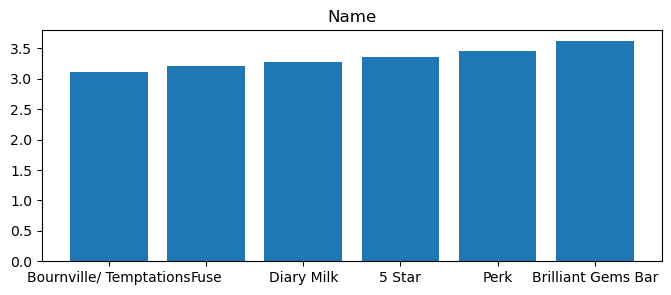

Size
Large     3.214286
Medium    3.335714
Small     3.378571
Name: Value, dtype: float64


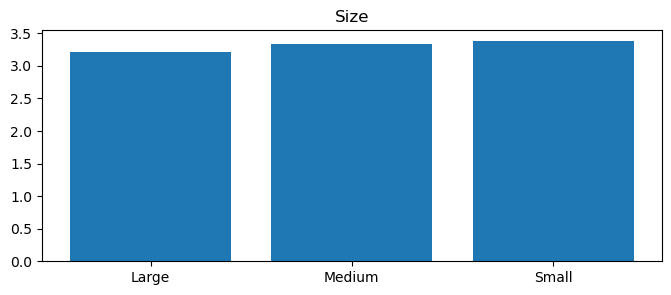

Wrapping
no foil wrapper    3.064286
Silver foil        3.378571
Gold foil          3.485714
Name: Value, dtype: float64


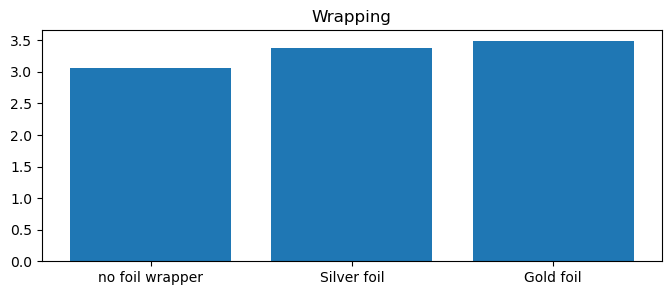

In [731]:
cols = ['Name', 'Size', 'Wrapping']
for col in cols:
    df3 = df.groupby(col)['Value'].agg('mean').sort_values()
    print(df3)
    plt.figure(figsize=(8,3))
    plt.title(col)
    plt.bar(x=df3.index, height=df3.values)
    plt.show()

**Inferences:**
- Name: The responses on all the 6 product names is almost similar, by a very small margin, the `Brilliant Gems Bar` has the highest ranking of all.
- Size: There is no clear preference option from the three sizes. All the three sizes are equally preferred.
- Wrapping: The preferences of wrapping is also almost simliar among the three categories. However, among the three, `the silver and gold wrappers` are mpst preferred over no wrappers.

In [733]:
df2 = pd.get_dummies(df, columns=['Name', 'Size', 'Wrapping'], drop_first=True).astype('int')

In [737]:
df2.sample(2)

,respondant,Value,Name_Bournville/ Temptations,Name_Brilliant Gems Bar,Name_Diary Milk,Name_Fuse,Name_Perk,Size_Medium,Size_Small,Wrapping_Silver foil,Wrapping_no foil wrapper
394,32,0,0,1,0,0,0,1,0,0,0
246,20,3,0,0,0,0,0,0,1,1,0


In [738]:
y = df2['Value']
X = df2.drop(['respondant', 'Value'], axis=1)

In [739]:
X['const'] = 1

In [741]:
print(X.dtypes)
print(y.dtypes)

Name_Bournville/ Temptations    int32
Name_Brilliant Gems Bar         int32
Name_Diary Milk                 int32
Name_Fuse                       int32
Name_Perk                       int32
Size_Medium                     int32
Size_Small                      int32
Wrapping_Silver foil            int32
Wrapping_no foil wrapper        int32
const                           int64
dtype: object
int32


In [742]:
lir = sm.OLS(y, X).fit()
lir.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.514
Date:                Sun, 10 Nov 2024   Prob (F-statistic):              0.150
Time:                        02:40:50   Log-Likelihood:                -721.40
No. Observations:                 420   AIC:                             1461.
Df Residuals:                     411   BIC:                             1497.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Name_Bournville/ Temptations     0.0211      0.179      0.118      0.906      -0.331       0.373
Name_Brilliant Gems Bar          0.7827      0.176      4.457      0.000       0.438       1.128
Name_Diary Milk                  0.1830      0.179      1.023      0.307      -0.169       0.535
Name_Fuse                       -0.3878      0.328     -1.184      0.237      -1.032       0.256
Name_Perk                        0.9204      0.182      5.046      0.000       0.562       1.279
Size_Medium                      0.3692      0.156      2.369      0.018       0.063       0.676
Size_Small                       0.7598      0.147      5.154      0.000       0.470       1.050
Wrapping_Silver foil             0.2206      0.156      1.416      0.158      -0.086       0.527
Wrapping_no foil wrapper         0.2912      0.147      1.975      0.049       0.001       0.581
const                            2.5367      0.087     29.305      0.000       2.367       2.707
==============================================================================
Omnibus:                       52.019   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.429
Skew:                          -0.343   Prob(JB):                     2.22e-05
Kurtosis:                       2.132   Cond. No.                     1.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.86e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [743]:
lp = lir.params
pars = pd.DataFrame({'var':lp.index, 'coeft':lp.values})
pars

,var,coeft
0,Name_Bournville/ Temptations,0.021088
1,Name_Brilliant Gems Bar,0.782653
2,Name_Diary Milk,0.182993
3,Name_Fuse,-0.387755
4,Name_Perk,0.920408
5,Size_Medium,0.369184
6,Size_Small,0.759796
7,Wrapping_Silver foil,0.220612
8,Wrapping_no foil wrapper,0.291224
9,const,2.536735


In [744]:
dfg = pd.get_dummies(df.loc[:, [ 'Name', 'Size', 'Wrapping']], 
                     columns=['Name', 'Size', 'Wrapping'])
cols = list(dfg.columns)

df3 = pd.DataFrame()
df3['var'] = cols
cols

['Name_5 Star',
 'Name_Bournville/ Temptations',
 'Name_Brilliant Gems Bar',
 'Name_Diary Milk',
 'Name_Fuse',
 'Name_Perk',
 'Size_Large',
 'Size_Medium',
 'Size_Small',
 'Wrapping_Gold foil',
 'Wrapping_Silver foil',
 'Wrapping_no foil wrapper']

## Feature Importance Analysis

In [746]:
df3 = df3.merge(pars, on='var', how='left')
df3 = df3.fillna(0)

In [747]:
df3['attrib'] = df3['var'].str.split('_', n=1, expand=True)[0]
df3['factors'] = df3['var'].str.split('_', n=1, expand=True)[1]

In [749]:
attrib = df3.groupby('attrib')['coeft'].agg(['min', 'max'])
attrib['imp'] = attrib['max'] - attrib['min']
attrib['imp%'] = attrib['imp']*100/(attrib['imp'].sum())
attrib = attrib.sort_values(['imp%'],ascending=False)
attrib

,min,max,imp,imp%
attrib,,,,
Name,-0.387755,0.920408,1.308163,55.449827
Size,0.000000,0.759796,0.759796,32.205882
Wrapping,0.000000,0.291224,0.291224,12.344291


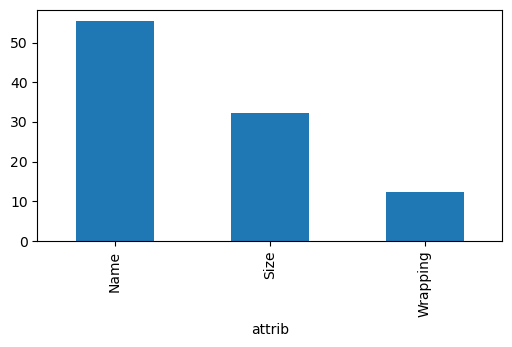

In [750]:
attrib['imp%'].plot.bar(figsize=(6,3))
plt.show()

**Inference:**
From the above observation, we can see that the attribute, `Name`, has the most importance of `55%`, followed by `Size` at `32%` and the least importance is attributed to `wrapping` at `12%`.

## Market Share Analysis

In [754]:
a = ['Diary Milk', '5 Star', 'Fuse', 'Perk', 'Brilliant Gems Bar', 'Bournville/ Temptations']
b = ['Small', 'Medium', 'Large']
c = ['Gold foil', 'Silver foil', 'no foil wrapper']

factors = [[i, j, k] for i in a  
                 for j in b 
                 for k in c]

In [755]:
df = pd.DataFrame(factors, columns=[ 'Name', 'Size', 'Wrapping'])
df.head()

,Name,Size,Wrapping
0,Diary Milk,Small,Gold foil
1,Diary Milk,Small,Silver foil
2,Diary Milk,Small,no foil wrapper
3,Diary Milk,Medium,Gold foil
4,Diary Milk,Medium,Silver foil


In [756]:
df3.head()

,var,coeft,attrib,factors
0,Name_5 Star,0.000000,Name,5 Star
1,Name_Bournville/ Temptations,0.021088,Name,Bournville/ Temptations
2,Name_Brilliant Gems Bar,0.782653,Name,Brilliant Gems Bar
3,Name_Diary Milk,0.182993,Name,Diary Milk
4,Name_Fuse,-0.387755,Name,Fuse


In [758]:
df4 = df3.loc[:, ['factors', 'coeft']]

for fs in ['Name', 'Size', 'Wrapping']:
    df5 = df4.rename(columns = {'coeft': str('coef_'+fs),'factors':fs})
    df = df.merge(df5, on=fs)
    
print(df.head())

         Name    Size         Wrapping  coef_Name  coef_Size  coef_Wrapping
0  Diary Milk   Small        Gold foil   0.182993   0.759796       0.000000
1  Diary Milk   Small      Silver foil   0.182993   0.759796       0.220612
2  Diary Milk   Small  no foil wrapper   0.182993   0.759796       0.291224
3  Diary Milk  Medium        Gold foil   0.182993   0.369184       0.000000
4  Diary Milk  Medium      Silver foil   0.182993   0.369184       0.220612


In [760]:
df['Tot_utils'] = df.loc[:,['coef_Name', 'coef_Size', 'coef_Wrapping']].sum(axis=1)
df['exp_tot_util'] = np.exp(0.8*df['Tot_utils'])
Tot_Exp_Util = df['exp_tot_util'].sum()
df['Mkt Share'] = df['exp_tot_util'] /Tot_Exp_Util

In [761]:
df = df.sort_values('Tot_utils', ascending=False)
df.head(15)

,Name,Size,Wrapping,coef_Name,coef_Size,coef_Wrapping,Tot_utils,exp_tot_util,Mkt Share
29,Perk,Small,no foil wrapper,0.920408,0.759796,0.291224,1.971429,4.841104,0.042607
28,Perk,Small,Silver foil,0.920408,0.759796,0.220612,1.900816,4.575212,0.040267
38,Brilliant Gems Bar,Small,no foil wrapper,0.782653,0.759796,0.291224,1.833673,4.335942,0.038161
37,Brilliant Gems Bar,Small,Silver foil,0.782653,0.759796,0.220612,1.763061,4.097795,0.036065
27,Perk,Small,Gold foil,0.920408,0.759796,0.000000,1.680204,3.834976,0.033752
32,Perk,Medium,no foil wrapper,0.920408,0.369184,0.291224,1.580816,3.541864,0.031172
36,Brilliant Gems Bar,Small,Gold foil,0.782653,0.759796,0.000000,1.542449,3.434802,0.030230
31,Perk,Medium,Silver foil,0.920408,0.369184,0.220612,1.510204,3.347331,0.029460
41,Brilliant Gems Bar,Medium,no foil wrapper,0.782653,0.369184,0.291224,1.443061,3.172275,0.027920
40,Brilliant Gems Bar,Medium,Silver foil,0.782653,0.369184,0.220612,1.372449,2.998041,0.026386


In [765]:
product = df[['Name', 'Size', 'Wrapping']].astype(str).agg('-'.join, axis=1).to_numpy()

utility_scores = df['Tot_utils'].values
utility_scores

array([ 1.97142857,  1.90081633,  1.83367347,  1.76306122,  1.68020408,
        1.58081633,  1.54244898,  1.51020408,  1.44306122,  1.37244898,
        1.28959184,  1.23401361,  1.21163265,  1.16340136,  1.15183673,
        1.14102041,  1.07387755,  1.07210884,  1.05102041,  1.00326531,
        1.0014966 ,  0.98040816,  0.94278912,  0.92040816,  0.84340136,
        0.78265306,  0.78088435,  0.77278912,  0.75979592,  0.6814966 ,
        0.66326531,  0.66040816,  0.61088435,  0.59265306,  0.58979592,
        0.55217687,  0.47421769,  0.40360544,  0.39027211,  0.37204082,
        0.36918367,  0.31231293,  0.29122449,  0.27265306,  0.24170068,
        0.22061224,  0.20204082,  0.1829932 ,  0.02108844,  0.        ,
       -0.01857143, -0.09653061, -0.16714286, -0.3877551 ])

In [770]:
total_utility=0
c= 0.833

for item in utility_scores:
    total_utility = total_utility + np.exp(c*item)

for item in utility_scores:
    probabilty = np.exp(c*item)/total_utility
    itemindex = np.where(utility_scores==item)

    print ('Market share of product %s is %s ' % (product[itemindex],probabilty*100))

Market share of product ['Perk-Small-no foil wrapper'] is 4.390210389415458 
Market share of product ['Perk-Small-Silver foil'] is 4.139426081765816 
Market share of product ['Brilliant Gems Bar-Small-no foil wrapper'] is 3.9142633492797487 
Market share of product ['Brilliant Gems Bar-Small-Silver foil'] is 3.690666815871201 
Market share of product ['Perk-Small-Gold foil'] is 3.444528915264638 
Market share of product ['Perk-Medium-no foil wrapper'] is 3.1708419456931267 
Market share of product ['Brilliant Gems Bar-Small-Gold foil'] is 3.0711041368452268 
Market share of product ['Perk-Medium-Silver foil'] is 2.9897122659096094 
Market share of product ['Brilliant Gems Bar-Medium-no foil wrapper'] is 2.827087841691807 
Market share of product ['Brilliant Gems Bar-Medium-Silver foil'] is 2.6655946092142178 
Market share of product ['Perk-Medium-Gold foil'] is 2.4878208101384853 
Market share of product ['Diary Milk-Small-no foil wrapper'] is 2.3752685005696996 
Market share of produc

In [773]:
chocs = df.groupby('Name')['Mkt Share'].sum()
chocs

Name
5 Star                     0.127120
Bournville/ Temptations    0.129283
Brilliant Gems Bar         0.237759
Diary Milk                 0.147161
Fuse                       0.093217
Perk                       0.265459
Name: Mkt Share, dtype: float64

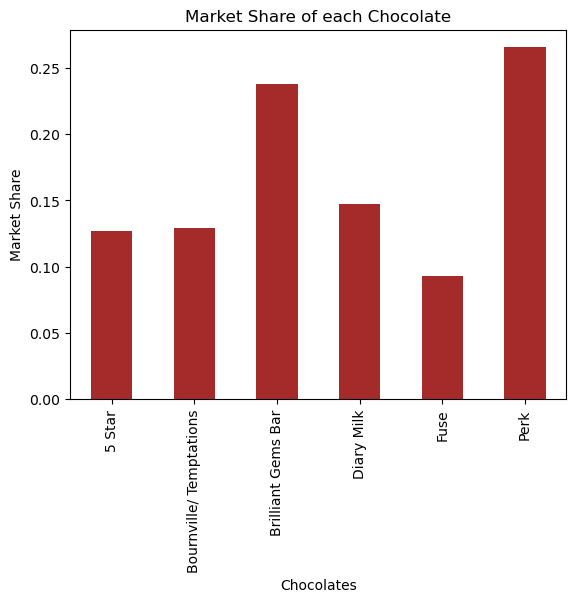

In [802]:
chocs.plot(kind='bar', color='brown')
plt.xlabel('Chocolates')
plt.ylabel('Market Share')
plt.title('Market Share of each Chocolate')
plt.show()

In [800]:
ch_size = df.groupby('Size')['Mkt Share'].sum()
ch_size

Size
Large     0.239232
Medium    0.321430
Small     0.439338
Name: Mkt Share, dtype: float64

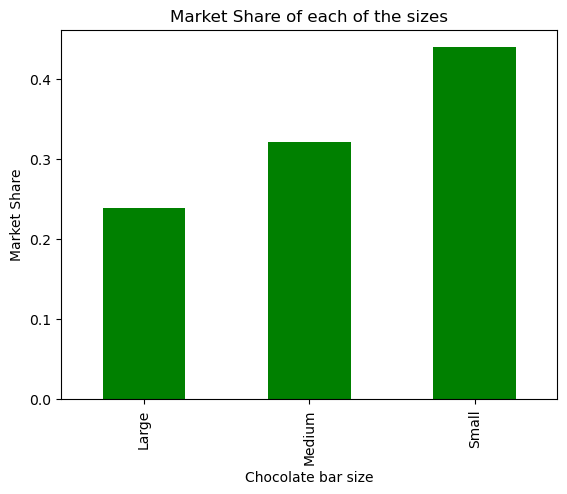

In [814]:
ch_size.plot(kind='bar', color='green')
plt.xlabel('Chocolate bar size')
plt.ylabel('Market Share')
plt.title('Market Share of each of the sizes')
plt.show()

In [810]:
wrap = df.groupby('Wrapping')['Mkt Share'].sum()
wrap

Wrapping
Gold foil          0.289404
Silver foil        0.345265
no foil wrapper    0.365331
Name: Mkt Share, dtype: float64

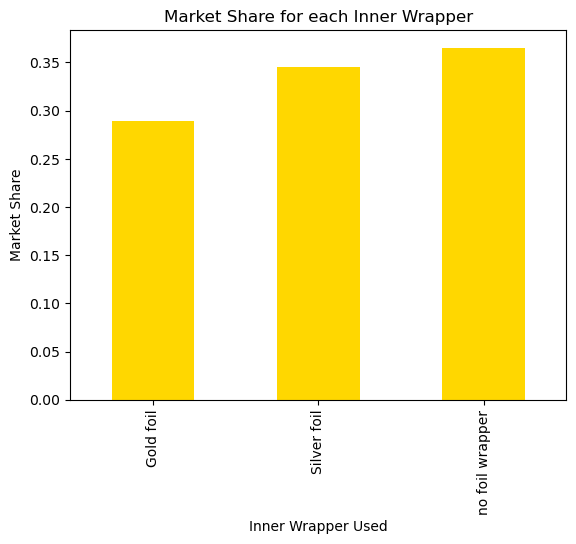

In [822]:
wrap.plot(kind='bar', color='gold')
plt.xlabel('Inner Wrapper Used')
plt.ylabel('Market Share')
plt.title('Market Share for each Inner Wrapper')
plt.show()

**Inference:** From the above Market Share analysis, we can note the following:
- `Perk` is leading in the Cadbury market with a market share of `26.5%`, closely followed by the new product, `Brilliant Gems Bar` at `23.77%`.
- `Diary Milk` is placed third in terms of market share with a value of `14.7%`.
- Including attribute-combinations, `Perk-Small has the most market share of 12%`, with all three of it's values in the `top 5`.
- All the attribute-combinations of the `Brilliant Gems Bar` are present in the `top 15` values of the market shares, making it the second most favoured product.
- Hence, with the second largest market share proportion, the launch of `Brilliant Gems Bar` would be favoured by most of the people as per the survey.